2. Remove Salt-and-Pepper Noise (Impulse Noise)
Why second? If you apply blur reduction first, the noise can spread and become harder to remove. Salt-and-pepper noise is best handled using a median filter,gaussian filter or  means filtering before sharpening or deblurring the image.

Remove Salt-and-Pepper Noise – If any small pixel artifacts appear due to sensor noise, a median filter can help clean them up.

##### Comparison Filters:

•	Mean Filter: 
o	Averages pixel values, which blurs salt-and-pepper noise but also blurs the entire image. It's not effective for this type of noise.

•	Geometric Mean Filter: 
o	Similar to the mean filter, but uses the geometric mean. It's still susceptible to blurring and not ideal for impulse noise.

•	Harmonic Mean Filter: 
o	Effective for salt noise (white pixels) but not pepper noise (black pixels). It also tends to perform poorly when both types of noise are present.

•	Contra-Harmonic Mean Filter: 
o	Can be effective, but its performance depends heavily on the chosen parameter. Incorrect parameters can worsen the noise. It is more complex to use than a median filter.

•	Gaussian Filter: 
o	Designed to remove Gaussian noise, not impulse noise. It will blur salt-and-pepper noise but not effectively eliminate it.

•	Max and Min Filters: 
o	These filters can exacerbate salt-and-pepper noise. The max filter will emphasize salt noise, and the min filter will emphasize pepper noise.

•	Midpoint Filter: 
o	Calculates the midpoint between the maximum and minimum pixel values. It can reduce salt-and-pepper noise to some extent, but it's not as effective as the median filter.

Median Filter Excels:
o	By replacing a pixel's value with the median of its neighbors, it effectively eliminates the extreme values caused by salt and pepper.


so looking at Comparison of Filters we take three different filters to compaire the accuracy of them
1.Median Filter
2.Mean Filter
3.Gaussian Filter

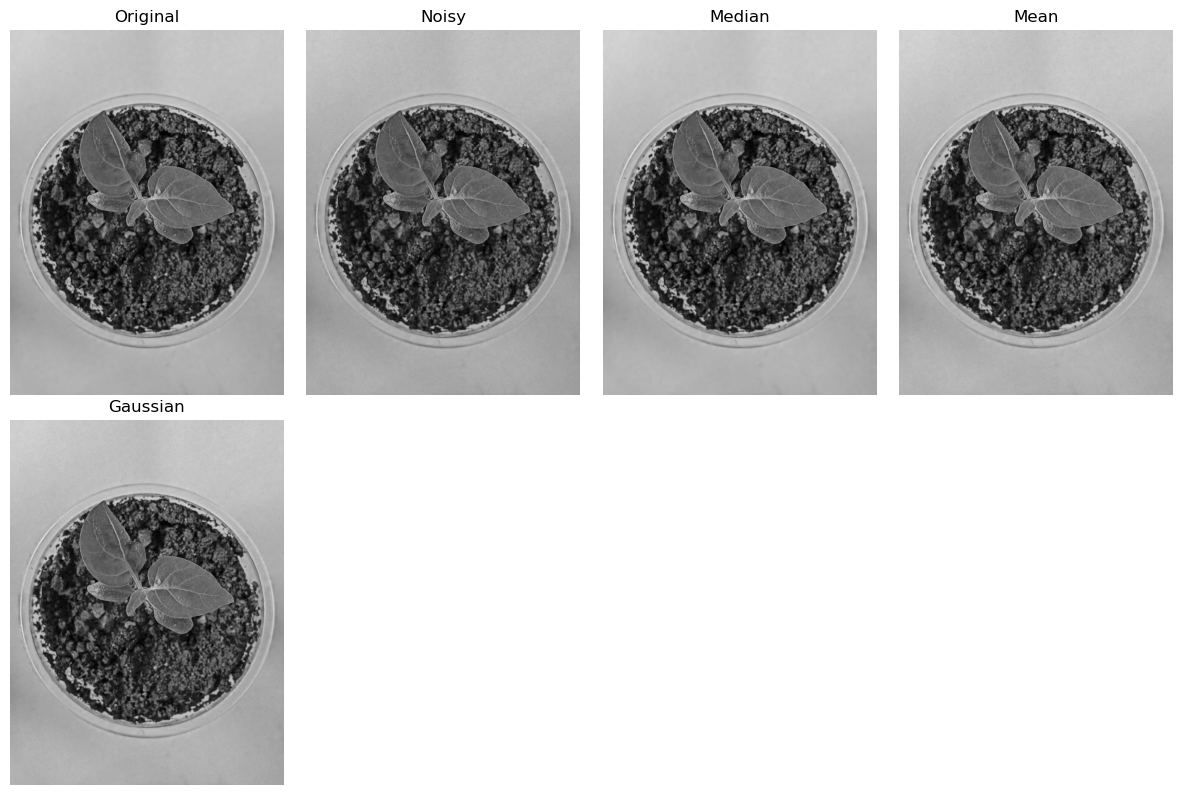

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def add_salt_and_pepper_noise(image, amount=0.02):
    noisy_image = image.copy()
    num_salt = int(amount * image.size * 0.5)
    num_pepper = int(amount * image.size * 0.5)
    
    # Add salt (white) noise
    coords = [np.random.randint(0, i - 1, num_salt) for i in image.shape[:2]]
    noisy_image[coords[0], coords[1]] = 255
    
    # Add pepper (black) noise
    coords = [np.random.randint(0, i - 1, num_pepper) for i in image.shape[:2]]
    noisy_image[coords[0], coords[1]] = 0
    
    return noisy_image

# Load image
denoise_image = cv2.imread('img/3_reducing_fixing_non-uniform illumination_CLAHE_YCrCb_img_075_100.jpg', cv2.IMREAD_GRAYSCALE)
noisy_image = add_salt_and_pepper_noise(denoise_image)

# Apply different filters
median_filtered = cv2.medianBlur(noisy_image, 5)
mean_filtered = cv2.blur(noisy_image, (5, 5))
gaussian_filtered = cv2.GaussianBlur(noisy_image, (5, 5), 0)

# Plot results
filters = ['Original', 'Noisy', 'Median', 'Mean', 'Gaussian']
images = [denoise_image, noisy_image, median_filtered, mean_filtered, gaussian_filtered]

plt.figure(figsize=(12, 8))
for i in range(len(images)):
    plt.subplot(2, 4, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(filters[i])
    plt.axis('off')

plt.tight_layout()
plt.show()


when workin with RGB images applying filter to splitied r,g,b, channels ensures better noise removal while preserving color details.

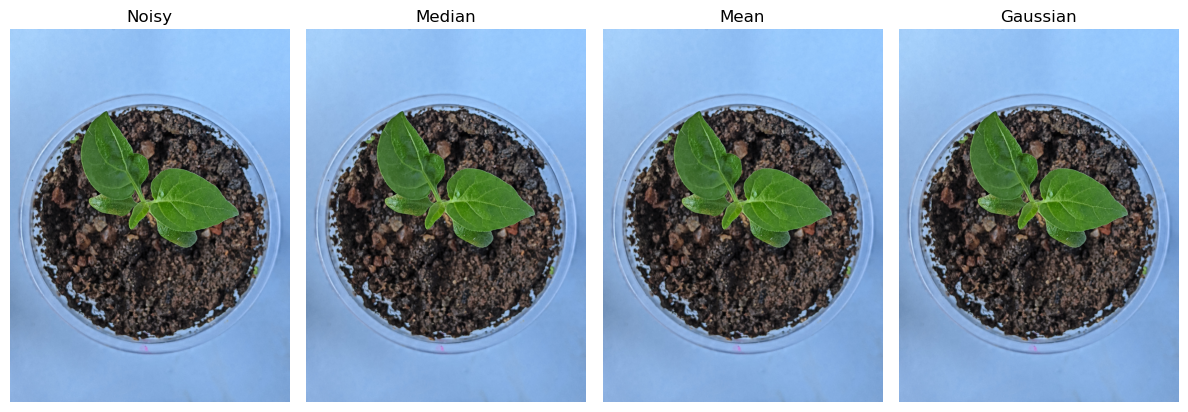

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#noisy_image

# Load image
noisy_image = cv2.imread('img/3_reducing_fixing_non-uniform illumination_CLAHE_YCrCb_img_075_100.jpg')
image = cv2.cvtColor(noisy_image, cv2.COLOR_BGR2RGB)  # Convert to RGB

# Split channels
b_channel, g_channel, r_channel = cv2.split(image)

# Apply different filters to each channel
median_b = cv2.medianBlur(b_channel, 5)
median_g = cv2.medianBlur(g_channel, 5)
median_r = cv2.medianBlur(r_channel, 5)
median_filtered = cv2.merge([median_b, median_g, median_r])

mean_b = cv2.blur(b_channel, (5, 5))
mean_g = cv2.blur(g_channel, (5, 5))
mean_r = cv2.blur(r_channel, (5, 5))
mean_filtered = cv2.merge([mean_b, mean_g, mean_r])

gaussian_b = cv2.GaussianBlur(b_channel, (5, 5), 0)
gaussian_g = cv2.GaussianBlur(g_channel, (5, 5), 0)
gaussian_r = cv2.GaussianBlur(r_channel, (5, 5), 0)
gaussian_filtered = cv2.merge([gaussian_b, gaussian_g, gaussian_r])


# cv2 import imwrite
from cv2 import imwrite
imwrite('img/4_removing salt-and-pepper noise_median_filtered.jpg',cv2.cvtColor(median_filtered, cv2.COLOR_BGR2RGB))
imwrite('img/4_removing salt-and-pepper noise_mean_filtered.jpg',cv2.cvtColor(mean_filtered, cv2.COLOR_BGR2RGB))
imwrite('img/4_removing salt-and-pepper noise_gaussian_filtered.jpg',cv2.cvtColor(gaussian_filtered, cv2.COLOR_BGR2RGB))
# Plot results
filters = ['Noisy', 'Median', 'Mean', 'Gaussian']
images = [ image, median_filtered, mean_filtered, gaussian_filtered]

plt.figure(figsize=(12, 8))
for i in range(len(images)):
    plt.subplot(2, 4, i + 1)
    plt.imshow(images[i])
    plt.title(filters[i])
    plt.axis('off')

plt.tight_layout()
plt.show()


This script:
1.	Applies various noise removal filters.
2.	Displays the results for visual comparison.

The median filter is usually the best for salt-and-pepper noise because it removes the noise without overly blurring the image.


#### When it comes to removing salt-and-pepper noise, the clear winner among the filters we listed is the median filter. Here's 

why :

Why Median Filter Excels:

•	Effective Against Impulse Noise: 

o	Salt-and-pepper noise is a type of impulse noise, characterized by abrupt, drastic changes in pixel values. The median filter is specifically designed to handle this type of noise.
o	By replacing a pixel's value with the median of its neighbors, it effectively eliminates the extreme values caused by salt and pepper.

•	Edge Preservation:

o	Unlike mean filters, which tend to blur edges, the median filter preserves edges relatively well. This is crucial for maintaining image detail.

In summary:
•	The median filter is the most reliable and effective filter for removing salt-and-pepper noise.
•	When very high levels of salt and pepper noise are present, an adaptive median filter can be used for better results.
Therefore, if your primary goal is to remove salt-and-pepper noise, the median filter is the optimal choice.


In [1]:
def detect_salt_and_pepper_noise(image_path):
    # Load image in grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Compute percentage of salt-and-pepper noise
    total_pixels = img.size
    salt_pepper_pixels = np.sum((img == 0) | (img == 255))
    noise_percentage = (salt_pepper_pixels / total_pixels) * 100
    
    print(f"Salt-and-Pepper Noise Percentage: {noise_percentage:.2f}%")
    
detect_salt_and_pepper_noise("img/plant_image_3.jpg")
detect_salt_and_pepper_noise("img/4_removing salt-and-pepper noise_median_filtered.jpg")

NameError: name 'cv2' is not defined

### Lets check the different between original image and filtered

#### def detect_salt_and_pepper_noise(image_path)

This code snippet calculates the percentage of salt-and-pepper noise in a grayscale image represented by the img NumPy array. Let's break it down:

1.	total_pixels = img.size:
o	img.size returns the total number of elements (pixels) in the img array. This gives you the total pixel count of the image.


2.	salt_pepper_pixels = np.sum((img == 0) | (img == 255)):
o	This line identifies and counts the pixels that are considered salt-and-pepper noise.
o	img == 0: This creates a boolean array where each element is True if the corresponding pixel in img is equal to 0 (black) and False otherwise.
o	img == 255: This creates another boolean array where each element is True if the corresponding pixel in img is equal to 255 (white) and False otherwise.
o	(img == 0) | (img == 255): The | operator performs a bitwise OR operation on the two boolean arrays. This results in a new boolean array where an element is True if the corresponding pixel is either black (0) or white (255).
o	np.sum(...): This function sums the True values in the resulting boolean array. Since True is treated as 1 and False as 0, this effectively counts the number of black and white pixels, which are considered salt-and-pepper noise.


3.	noise_percentage = (salt_pepper_pixels / total_pixels) * 100:
o	This line calculates the percentage of salt-and-pepper noise.
o	salt_pepper_pixels / total_pixels: This divides the number of salt-and-pepper noise pixels by the total number of pixels, giving you the fraction of noise pixels.
o	... * 100: This multiplies the fraction by 100 to express it as a percentage.
